## Pytorch Ecosystem for Training Neural Netwrok

In [1]:
# cell 1
# Install dependencies
!pip install torch torchvision
!pip install tqdm matplotlib numpy

In [2]:
# cell 2
# Import Libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

### Single Layer Perceptron
* We will be using single Perceptron Neuron for simulating the behaviour of different basic logic gates.
* In pytorch while defining model architecture, the model class must inherit the parent class nn.Module. 
* The model class must at least contains two methods viz. __init__() method in which we define all the layers and forward() method in which we pass the data and operates on data.

In [3]:
# cell 3
# Perceptron architecture
class Perceptron(nn.Module):
    def __init__(self, input_dim):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(input_dim, 1)
    
    def forward(self, x):
        x = self.fc(x)
        x = torch.sigmoid(x)
        return x

### Training Loop
* In native pytorch, we have to write our own training loop.
* First set the model to train mode that ensures gradients are computed and propagated.
* Then we have to set optimizer to zero_grad() at the beginning of every epoch otherwise the gradient will get accumulated from previous epochs.
* Then, we get the outputs for inputs from model and calculate loss.
* The loss is then used to calculate gradients for backward propagation.
* Then, weights are updated.

In [4]:
# cell 4
# # Training loop
def train_perceptron(model, criterion, optimizer, data, targets, epochs=100):
    for epoch in range(epochs):
        model.train()
        
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(data)
        loss = criterion(outputs, targets)
        
        # Backward pass
        loss.backward()
        
        # Optimization step: update weights
        optimizer.step()
        
        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

### Prediction from Trained Model
* Before we make prediction from model, we have to set model to eval model so that gradients will not be computed and stored. It will also make inferencing faster.

In [5]:
# cell 5
# Predict outputs
def test_perceptron(model, data):
    model.eval()
    with torch.no_grad():
        outputs = model(data)
        predicted = outputs.round().squeeze() #rounds the output value to the nearest integer
        return predicted

In [6]:
# cell 6
# Sample data (AND logic gate)
data = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
targets = torch.tensor([[0], [0], [0], [1]], dtype=torch.float32)

### Visualization of AND Gate Data

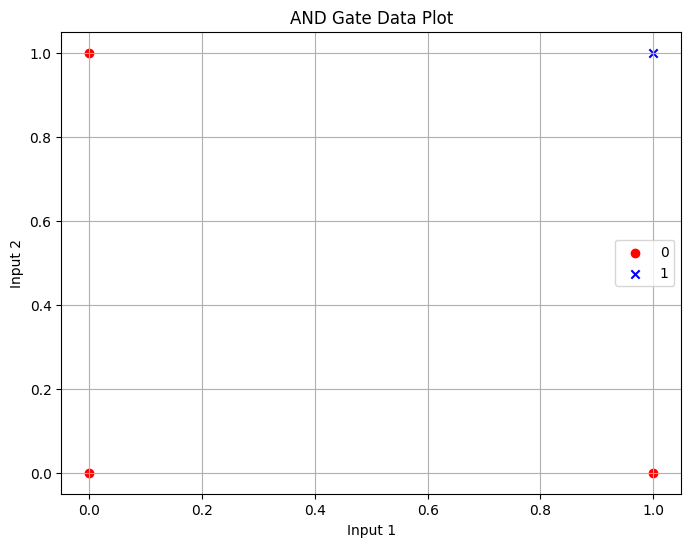

In [7]:
# cell 7
# Scatter plot for AND gate data
plt.figure(figsize=(8, 6))

for i in range(data.shape[0]):
    if targets[i] == 0:
        plt.scatter(data[i, 0].item(), data[i, 1].item(), color='red', marker='o', label='0' if i == 0 else "")
    else:
        plt.scatter(data[i, 0].item(), data[i, 1].item(), color='blue', marker='x', label='1' if i == 3 else "")

plt.title('AND Gate Data Plot')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# cell 8
# Instantiate the perceptron model
input_dim = data.shape[1]  # number of input features
perceptron = Perceptron(input_dim)

# Define loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(perceptron.parameters(), lr=0.1)

In [9]:
# cell 9
train_perceptron(perceptron, criterion, optimizer, data, targets, epochs=250)

Epoch [10/250], Loss: 0.7004
Epoch [20/250], Loss: 0.6457
Epoch [30/250], Loss: 0.6094
Epoch [40/250], Loss: 0.5820
Epoch [50/250], Loss: 0.5594
Epoch [60/250], Loss: 0.5396
Epoch [70/250], Loss: 0.5217
Epoch [80/250], Loss: 0.5052
Epoch [90/250], Loss: 0.4899
Epoch [100/250], Loss: 0.4756
Epoch [110/250], Loss: 0.4622
Epoch [120/250], Loss: 0.4496
Epoch [130/250], Loss: 0.4378
Epoch [140/250], Loss: 0.4266
Epoch [150/250], Loss: 0.4160
Epoch [160/250], Loss: 0.4060
Epoch [170/250], Loss: 0.3965
Epoch [180/250], Loss: 0.3876
Epoch [190/250], Loss: 0.3790
Epoch [200/250], Loss: 0.3709
Epoch [210/250], Loss: 0.3631
Epoch [220/250], Loss: 0.3557
Epoch [230/250], Loss: 0.3487
Epoch [240/250], Loss: 0.3419
Epoch [250/250], Loss: 0.3355


In [10]:
# cell 10
# Predict outputs
predicted = test_perceptron(perceptron, data)
print(f'Predicted: {predicted.numpy()}')
print(f'Targets: {targets.squeeze().numpy()}')

Predicted: [0. 0. 0. 1.]
Targets: [0. 0. 0. 1.]


### Visualization of Decision Boundary Learnt By Perceptron

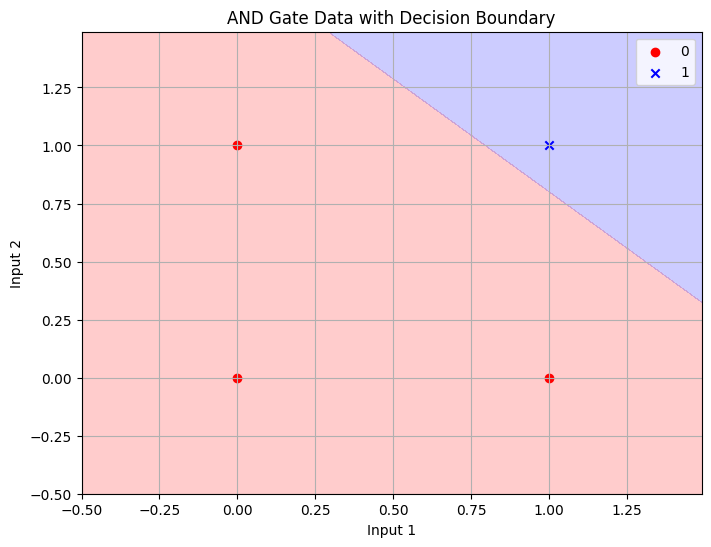

In [11]:
# cell 11
plt.figure(figsize=(8, 6))

# Scatter plot for AND gate data
for i in range(data.shape[0]):
    if targets[i] == 0:
        plt.scatter(data[i, 0].item(), data[i, 1].item(), color='red', marker='o', label='0' if i == 0 else "")
    else:
        plt.scatter(data[i, 0].item(), data[i, 1].item(), color='blue', marker='x', label='1' if i == 3 else "")
        
# Generate a grid of points
x_min, x_max = data[:, 0].min() - 0.5, data[:, 0].max() + 0.5
y_min, y_max = data[:, 1].min() - 0.5, data[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# Predict outputs for the grid points
with torch.no_grad():
    zz = perceptron(grid).reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, zz, levels=[0, 0.5, 1], alpha=0.2, colors=['red', 'blue'])

plt.title('AND Gate Data with Decision Boundary')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.legend()
plt.grid(True)
plt.show()

### How it performs for XOR Gate?

In [12]:
# cell 12
# Sample data (XOR logic gate)
# Your code here
xor_data = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
xor_targets = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

### Visualization of XOR Gate Data

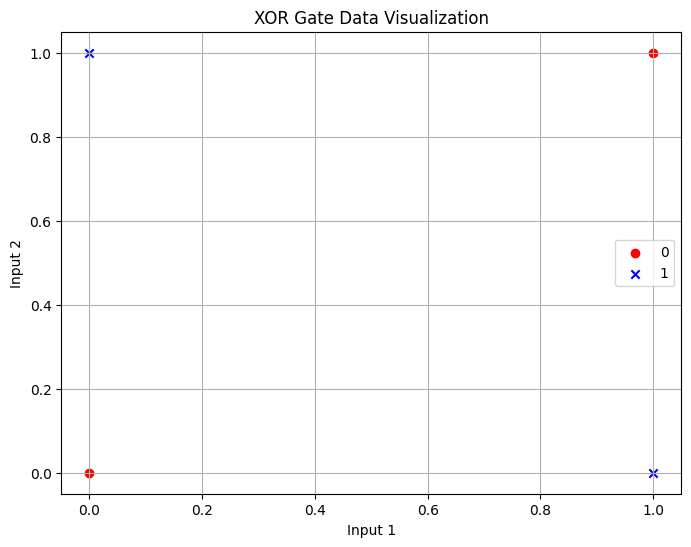

In [13]:
# cell 13
plt.figure(figsize=(8, 6))

# Scatter plot for XOR gate data
for i in range(xor_data.shape[0]):
    if xor_targets[i] == 0:
        plt.scatter(xor_data[i, 0].item(), data[i, 1].item(), color='red', marker='o', label='0' if i == 0 else "")
    else:
        plt.scatter(xor_data[i, 0].item(), data[i, 1].item(), color='blue', marker='x', label='1' if i == 1 else "")

plt.title('XOR Gate Data Visualization')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.legend()
plt.grid(True)
plt.show()


Training Single Perceptron Neuron for XOR Gate

In [14]:
# cell 14
train_perceptron(perceptron, criterion, optimizer, xor_data, xor_targets, epochs=400)

Epoch [10/400], Loss: 0.8437
Epoch [20/400], Loss: 0.8228
Epoch [30/400], Loss: 0.8090
Epoch [40/400], Loss: 0.7989
Epoch [50/400], Loss: 0.7908
Epoch [60/400], Loss: 0.7839
Epoch [70/400], Loss: 0.7777
Epoch [80/400], Loss: 0.7721
Epoch [90/400], Loss: 0.7668
Epoch [100/400], Loss: 0.7619
Epoch [110/400], Loss: 0.7574
Epoch [120/400], Loss: 0.7531
Epoch [130/400], Loss: 0.7490
Epoch [140/400], Loss: 0.7452
Epoch [150/400], Loss: 0.7417
Epoch [160/400], Loss: 0.7383
Epoch [170/400], Loss: 0.7352
Epoch [180/400], Loss: 0.7322
Epoch [190/400], Loss: 0.7295
Epoch [200/400], Loss: 0.7269
Epoch [210/400], Loss: 0.7246
Epoch [220/400], Loss: 0.7223
Epoch [230/400], Loss: 0.7202
Epoch [240/400], Loss: 0.7183
Epoch [250/400], Loss: 0.7165
Epoch [260/400], Loss: 0.7148
Epoch [270/400], Loss: 0.7132
Epoch [280/400], Loss: 0.7118
Epoch [290/400], Loss: 0.7104
Epoch [300/400], Loss: 0.7091
Epoch [310/400], Loss: 0.7080
Epoch [320/400], Loss: 0.7069
Epoch [330/400], Loss: 0.7059
Epoch [340/400], Lo

In [15]:
# cell 15
# Predicting outputs for XOR Gate
predicted = test_perceptron(perceptron, xor_data)
print(f'Predicted: {predicted.numpy()}')
print(f'Targets: {xor_targets.squeeze().numpy()}')
#data ko trend bujhnai sakena, can't classify linearly-- can't be done by single perceptron

Predicted: [0. 0. 0. 1.]
Targets: [0. 1. 1. 0.]


### Visualization of Decision Boundary Learnt by Sinlge Perceptron Neuron for XOR Gate

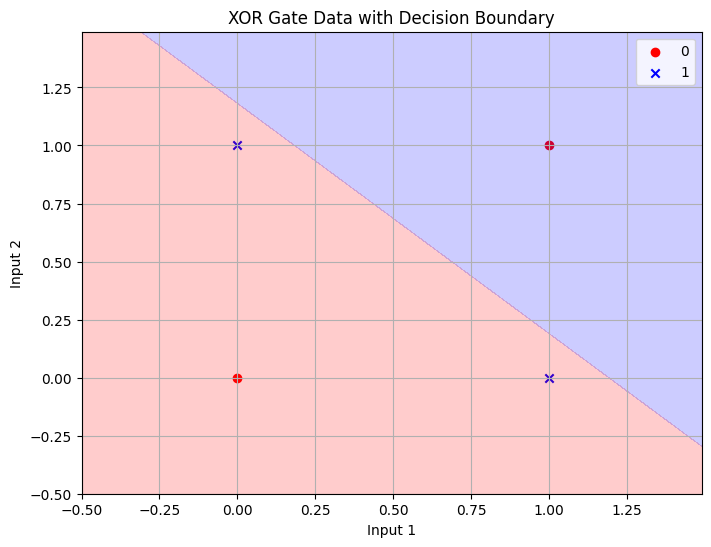

In [16]:
# cell 16
plt.figure(figsize=(8, 6))

# Scatter plot for XOR gate data
for i in range(xor_data.shape[0]):
    if xor_targets[i] == 0:
        plt.scatter(xor_data[i, 0].item(), data[i, 1].item(), color='red', marker='o', label='0' if i == 0 else "")
    else:
        plt.scatter(xor_data[i, 0].item(), data[i, 1].item(), color='blue', marker='x', label='1' if i == 1 else "")

# Generate a grid of points
x_min, x_max = data[:, 0].min() - 0.5, data[:, 0].max() + 0.5
y_min, y_max = data[:, 1].min() - 0.5, data[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# Predict outputs for the grid points
with torch.no_grad():
    zz = perceptron(grid).reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, zz, levels=[0, 0.5, 1], alpha=0.2, colors=['red', 'blue'])

plt.title('XOR Gate Data with Decision Boundary')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.legend()
plt.grid(True)
plt.show()


## MultiLayer Perceptron

In [17]:
# cell 17
# Your code here

class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 3)  # First hidden layer with 2 neurons
        self.fc2 = nn.Linear(3,1)          # Output layer with 1 neuron
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

In [18]:
# cell 18
def train_mlp(model, criterion, optimizer, data, targets, epochs=1000):
    for epoch in range(epochs):
        model.train()
        
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(data)
        loss = criterion(outputs, targets)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        if (epoch+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

In [19]:
# cell 19
# Predict outputs
def test_mlp(model, data):
    model.eval()
    with torch.no_grad():
        outputs = model(data)
        predicted = outputs.round().squeeze()
        return predicted

In [20]:
# cell 20
# Sample data (XOR logic gate)
xor_data = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
xor_targets = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

In [21]:
# cell 21
# Instantiate the MLP model
input_dim = data.shape[1]
mlp = MLP(input_dim)

# Define loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(mlp.parameters(), lr=0.1)

In [22]:
# cell 22
train_mlp(mlp, criterion, optimizer, xor_data, xor_targets, epochs=20000)

Epoch [100/20000], Loss: 0.6852
Epoch [200/20000], Loss: 0.6595
Epoch [300/20000], Loss: 0.6042
Epoch [400/20000], Loss: 0.5377
Epoch [500/20000], Loss: 0.4780
Epoch [600/20000], Loss: 0.3855
Epoch [700/20000], Loss: 0.2737
Epoch [800/20000], Loss: 0.1811
Epoch [900/20000], Loss: 0.1214
Epoch [1000/20000], Loss: 0.0850
Epoch [1100/20000], Loss: 0.0629
Epoch [1200/20000], Loss: 0.0480
Epoch [1300/20000], Loss: 0.0372
Epoch [1400/20000], Loss: 0.0299
Epoch [1500/20000], Loss: 0.0246
Epoch [1600/20000], Loss: 0.0207
Epoch [1700/20000], Loss: 0.0178
Epoch [1800/20000], Loss: 0.0155
Epoch [1900/20000], Loss: 0.0136
Epoch [2000/20000], Loss: 0.0121
Epoch [2100/20000], Loss: 0.0109
Epoch [2200/20000], Loss: 0.0099
Epoch [2300/20000], Loss: 0.0090
Epoch [2400/20000], Loss: 0.0082
Epoch [2500/20000], Loss: 0.0076
Epoch [2600/20000], Loss: 0.0070
Epoch [2700/20000], Loss: 0.0065
Epoch [2800/20000], Loss: 0.0061
Epoch [2900/20000], Loss: 0.0057
Epoch [3000/20000], Loss: 0.0054
Epoch [3100/20000],

In [23]:
# cell 23
# Predicting outputs for XOR Gate
predicted = test_mlp(mlp, xor_data)
print(f'Predicted: {predicted.numpy()}')
print(f'Targets: {xor_targets.squeeze().numpy()}')

Predicted: [0. 1. 1. 0.]
Targets: [0. 1. 1. 0.]


Visualization of Decision Boundary Learnt by MLP for XOR Gate

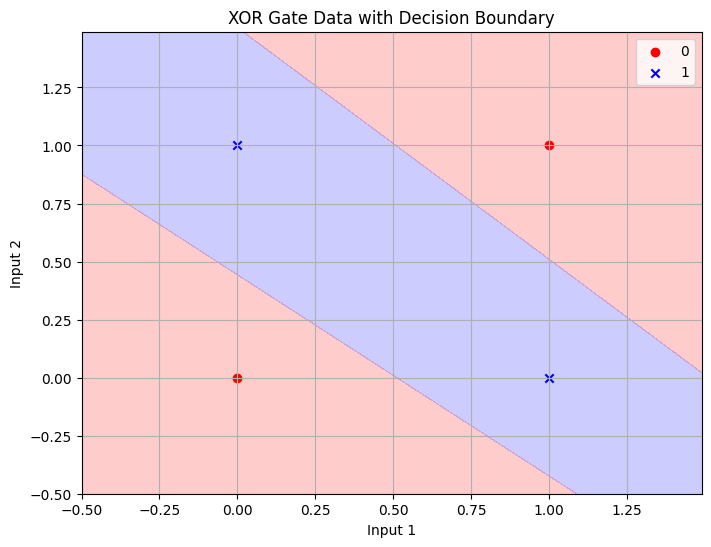

In [24]:
# cell 24
plt.figure(figsize=(8, 6))

# Scatter plot for XOR gate data
for i in range(xor_data.shape[0]):
    if xor_targets[i] == 0:
        plt.scatter(xor_data[i, 0].item(), data[i, 1].item(), color='red', marker='o', label='0' if i == 0 else "")
    else:
        plt.scatter(xor_data[i, 0].item(), data[i, 1].item(), color='blue', marker='x', label='1' if i == 1 else "")

# Generate a grid of points
x_min, x_max = xor_data[:, 0].min() - 0.5, data[:, 0].max() + 0.5
y_min, y_max = xor_data[:, 1].min() - 0.5, data[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# Predict outputs for the grid points
with torch.no_grad():
    zz = mlp(grid).reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, zz, levels=[0, 0.5, 1], alpha=0.2, colors=['red', 'blue'])

plt.title('XOR Gate Data with Decision Boundary')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.legend()
plt.grid(True)
plt.show()

## MultiLayer Perceptron for FashionMNIST Dataset
* Pytorch Model Development Pipeline
    * Loading Dataset
    * Building DataLoader
    * Build Model Architecture
    * Prepare Training/Optimization Loop
    * Model Training and Evaluation
    * Model Saving
    * Model Inferencing
    * Model Quantization and Conversion

* Reference: [here](https://pytorch.org/tutorials/beginner/basics/intro.html)

In [25]:
# cell 25
import torch
# from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt
from tqdm import tqdm

### Step 1: Loading Dataset

* We will be loading the Fashion-MNIST dataset from TorchVision. 
* Fashion-MNIST is a dataset of Zalando’s article images consisting of 60,000 training examples and 10,000 test examples. 
* Each example comprises a 28×28 grayscale image and an associated label from one of 10 classes.

In [47]:
# cell 26
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [48]:
# cell 27
print(f"Number of training samples: {len(training_data)}")
print(f"Number of testing samples: {len(test_data)}")

Number of training samples: 60000
Number of testing samples: 10000


In [49]:
# cell 28
image, label = training_data[0]
print("Image/label pair as each sample: ", training_data[0])

Image/label pair as each sample:  (tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.00

In [50]:
# cell 29
print("Shape of each sample: ", training_data[0][0].shape)
print("Label for 0th sample: ", training_data[0][1])

Shape of each sample:  torch.Size([1, 28, 28])
Label for 0th sample:  9


In [51]:
# the output above is ([1, 28, 28])
# 1 - grey image, 28, 28 - height and width of the image

### Label Mapping

In [52]:
# cell 30
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

### Visualizing the dataset

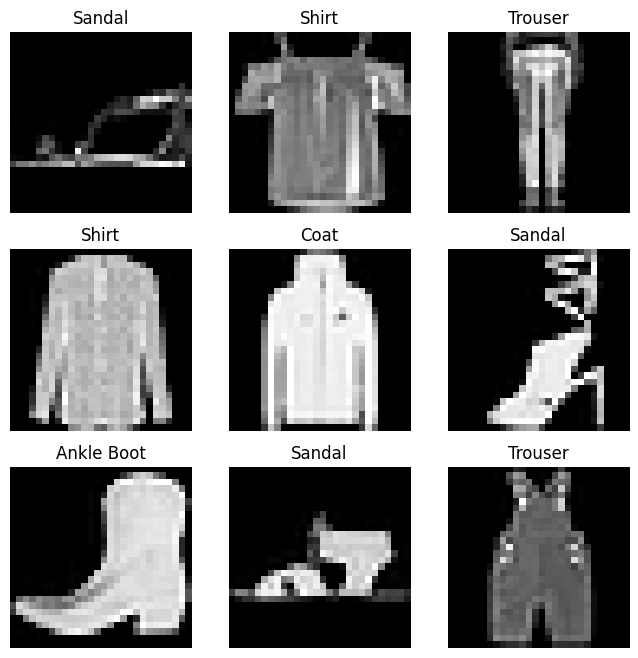

In [53]:
# cell 31
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Step 2: Building Dataloader

In [54]:
# cell 32
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True) #shuffle -- to make it random

In [55]:
# cell 33
train_features, train_labels = next(iter(train_dataloader))
print(f"Training batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Training batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


### Step 3: Build Model Architecture

In [56]:
# cell 34
# Your code here
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [57]:
# cell 35
device = ("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

Using cpu device


In [58]:
# cell 36
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=512, bias=True)
  )
)


### Step 4: Prepare Training/Optimization Loop

In [62]:
# cell 37
# Your code here

def train(train_dataloader, test_dataloader, model, loss_fn, optimizer, epochs, device, val_interval=1):
    train_loss_values = []
    val_loss_values = []
    val_accuracy_values = []
    # Training loop
    for epoch in range(epochs):
        print("-" * 10)
        print(f"epoch {epoch + 1}/{epochs}")
        model.train()   # set model on training mode
        epoch_loss = 0
        val_epoch_loss = 0
        step = 0
        correct_count = 0
        for batch_data in tqdm(train_dataloader):
            step += 1
            inputs, labels = (
                batch_data[0].to(device),
                batch_data[1].to(device),
            )
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)   # Batch loss
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        epoch_loss /= step
        train_loss_values.append(epoch_loss)
        print(f"Epoch {epoch + 1} average training loss: {epoch_loss:.4f}")
      
        # Validation loop
        if (epoch + 1) % val_interval == 0:
            model.eval()    # Setting model in eval mode
            with torch.no_grad():
                val_step = 0
                for val_data in test_dataloader:
                    val_step += 1
                    val_inputs, val_labels = (
                      val_data[0].to(device),
                      val_data[1].to(device),
                    )
                    outputs = model(val_inputs)
                    loss = loss_fn(outputs, val_labels)   # Batch loss
                    val_epoch_loss += loss.item()
                    correct_count += (outputs.argmax(1) == val_labels).type(torch.float).sum().item()
                    # print(correct_count)
            val_epoch_loss /= val_step
            accuracy = correct_count / len(test_dataloader.dataset)
            val_loss_values.append(val_epoch_loss)
            val_accuracy_values.append(accuracy)
            print(f"Epoch {epoch + 1} average validation loss: {val_epoch_loss:.4f}")
            print(f"Validation Accuracy: {(100 * accuracy):>0.1f}% \n")
            
    return train_loss_values, val_loss_values, val_accuracy_values
                  

### Step 5: Model Training and Evaluation

Setting Hyperparameters

In [63]:
# cell 38
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [64]:
# cell 39
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
train_loss_values, val_loss_values, val_accuracy_values = train(train_dataloader, test_dataloader, model, loss_fn, optimizer, epochs, device, val_interval=1)

----------
epoch 1/5


100%|████████████████████████████████████████| 938/938 [00:06<00:00, 154.50it/s]


Epoch 1 average training loss: 2.1344
Epoch 1 average validation loss: 1.8452
Validation Accuracy: 56.7% 

----------
epoch 2/5


100%|████████████████████████████████████████| 938/938 [00:05<00:00, 175.94it/s]


Epoch 2 average training loss: 1.6205
Epoch 2 average validation loss: 1.4335
Validation Accuracy: 61.0% 

----------
epoch 3/5


100%|████████████████████████████████████████| 938/938 [00:05<00:00, 159.97it/s]


Epoch 3 average training loss: 1.3022
Epoch 3 average validation loss: 1.2011
Validation Accuracy: 62.9% 

----------
epoch 4/5


100%|████████████████████████████████████████| 938/938 [00:07<00:00, 130.29it/s]


Epoch 4 average training loss: 1.1195
Epoch 4 average validation loss: 1.0608
Validation Accuracy: 64.2% 

----------
epoch 5/5


100%|████████████████████████████████████████| 938/938 [00:05<00:00, 158.00it/s]


Epoch 5 average training loss: 1.0035
Epoch 5 average validation loss: 0.9742
Validation Accuracy: 65.7% 



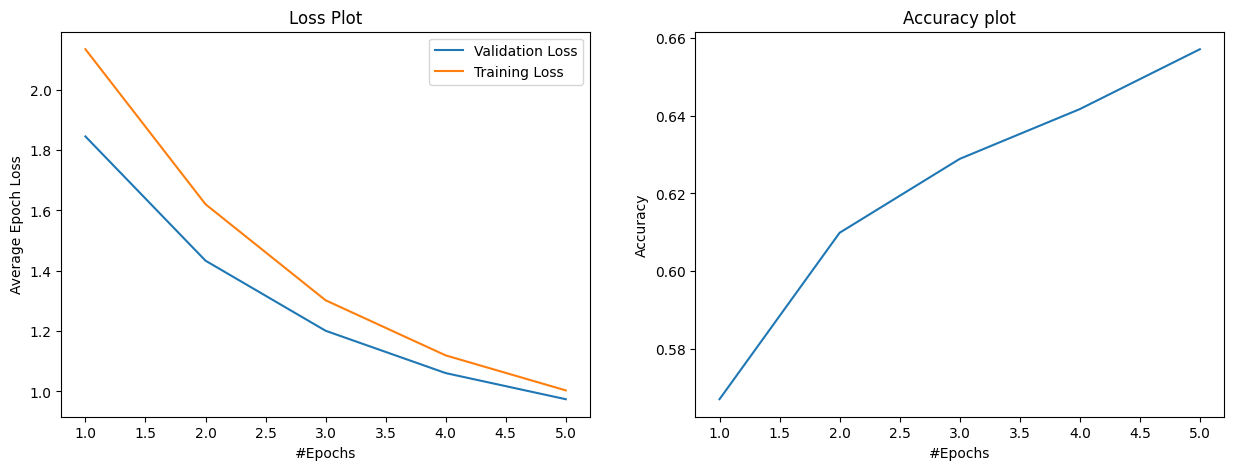

In [65]:
# cell 40
val_interval = 1
plt.figure(figsize=(15, 5))

# Subplot for training and validation loss
plt.subplot(1, 2, 1)
plt.title("Loss Plot")
train_num_epoch = [i + 1 for i in range(len(train_loss_values))]
val_num_epoch = [val_interval * (i + 1) for i in range(len(val_loss_values))]
plt.plot(val_num_epoch, val_loss_values)
plt.plot(train_num_epoch, train_loss_values)
plt.legend(["Validation Loss", "Training Loss"])
plt.xlabel("#Epochs")
plt.ylabel("Average Epoch Loss")

# Subplot for validation accuracy
plt.subplot(1, 2, 2)
val_num_epoch = [val_interval * (i + 1) for i in range(len(val_accuracy_values))]
plt.plot(val_num_epoch, val_accuracy_values)
plt.title("Accuracy plot")
plt.xlabel("#Epochs")
plt.ylabel("Accuracy")
plt.show()

### Step 6: Model Saving

#### Saving the entire model
* When we save the model with this approach, we could easily load the model without needing its architecture.
* But we could not resume training.

In [66]:
# cell 41
torch.save(model, "model.pth")

#### Loading the saved model

In [72]:
# cell 42
# Loading the saved model
model = torch.load("model.pth")

#### Saving model state and relevant information
* When we save the model with this approach, we need to load the model architecture first and then only we could load the weights.
* We could resume training from the saved checkpoint.

In [73]:
# cell 43
checkpoint = {
    "model_state": model.state_dict(),
    "optimizer_state": optimizer.state_dict(),
    "train_loss": train_loss_values,
    "val_loss": val_loss_values,
    "val_accuracy": val_accuracy_values
}
torch.save(checkpoint, 'checkpoint.pth.tar')

#### Loading the saved checkpoint

In [75]:
# cell 44
# Loading the checkpoint
checkpoint = torch.load("checkpoint.pth.tar")

# First load the model architecture i.e. instantiate the model class and optimizer
model = NeuralNetwork()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Then load the model weights and optimizer state
model.load_state_dict(checkpoint['model_state'])
optimizer.load_state_dict(checkpoint['optimizer_state'])

# We can use these values for plotting
train_loss_values = checkpoint['train_loss']
val_loss_values = checkpoint['val_loss']
val_accuracy_values = checkpoint['val_accuracy']

### Step 7: Model Inferencing

In [76]:
# cell 45
image, label = test_data[0]
print("Image shape: ", image.shape)
# Adding batch dimension
image_reshaped = image.unsqueeze(0).to(device) 
model = model.to(device)
print("Image shape after unsqueeze: ", image_reshaped.shape)
prediction = model(image_reshaped)
prediction_index = predicted.argmax().item()
print(f'Predicted: {prediction_index}')
print(f'Target: {label}')

Image shape:  torch.Size([1, 28, 28])
Image shape after unsqueeze:  torch.Size([1, 1, 28, 28])
Predicted: 1
Target: 9


Visualizing the Image

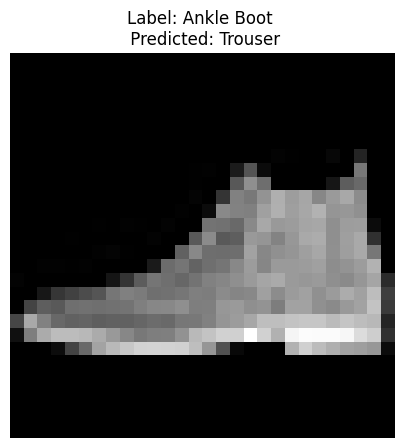

In [77]:
# cell 46
figure = plt.figure(figsize=(5, 5))
plt.title(f"Label: {labels_map[label]} \n Predicted: {labels_map[prediction_index]}")
plt.imshow(image.squeeze(), cmap="gray")
plt.xlabel(labels_map[prediction_index])
plt.axis("off")
plt.show()

### Step 8: Model Quantization and Conversion
* Model quantization refers to techniques for performing computations and storing tensors at lower bitwidths (usually int8) than floating point precision.
* Quantization enables:
    * 4x reduction in model size;
    * 2-4x reduction in memory bandwidth;
    * 2-4x faster inference due to savings in memory bandwidth and faster compute with int8 arithmetic (the exact speed up varies depending on the hardware, the runtime, and the model).
* In model conversion, we will convert the native pytorch model to ONNX(Open Neural Network Exchange) format which is open standard format for representing machine learning models

Quantizating model to int8 Precision

In [81]:
# cell 47
# Your Code Here
#load the model with architecture
model = NeuralNetwork()
model.load_state_dict(checkpoint['model_state']) #also load this

quantized_model = torch.quantization.quantize_dynamic(model, {torch.nn.Linear}, dtype=torch.qint8)
print(quantized_model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): DynamicQuantizedLinear(in_features=784, out_features=512, dtype=torch.qint8, qscheme=torch.per_tensor_affine)
    (1): ReLU()
    (2): DynamicQuantizedLinear(in_features=512, out_features=512, dtype=torch.qint8, qscheme=torch.per_tensor_affine)
    (3): ReLU()
    (4): DynamicQuantizedLinear(in_features=512, out_features=512, dtype=torch.qint8, qscheme=torch.per_tensor_affine)
  )
)


In [82]:
# cell 48
# Savimg quantized model
torch.save(quantized_model, "quantized_model.pth")

ONNX Conversion

In [83]:
# cell 49
# Install the dependencies for model conversion
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 8.0 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.3/309.3 kB 3.9 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 4.0 MB/s eta 0:00:00


In [84]:
# cell 50
# loaded_model = torch.load("quantized_model.pth")
dummy_input = torch.randn(1, 1, 28, 28).to(device)
torch.onnx.export(model.to(device), dummy_input, "quantized_model.onnx")  

OnnxExporterError: Module onnx is not installed!

In [ ]:
# cell 51
import onnxruntime as ort

EP_list = ['CPUExecutionProvider']
ort_sess = ort.InferenceSession("quantized_model.onnx", providers=EP_list)
input_name = ort_sess.get_inputs()[0].name

image, label = test_data[0]
input_data = np.expand_dims(image, axis=0)
outputs = ort_sess.run(None, {input_name: input_data})[0]
prediction_index = outputs.argmax().item()
print("Label: ", label)
print("Predicted: ", prediction_index)

## Assignment
* Implement the MLP for FashionMNIST Dataset Using [Pytorch-Ignite](https://pytorch-ignite.ai/tutorials/beginner/01-getting-started/)